# Support Vector Machine:

# Exploratory Data Analysis(EDA):

In [1]:
import pandas as pd
df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [2]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [3]:
df.shape

(2000, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
df.duplicated().sum()

1024

In [7]:
df[df.duplicated()]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,1279,bell,smooth,pink,no,foul,notched,distant,broad,pink,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,1275,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,549,conical,grooves,brown,no,foul,free,distant,broad,white,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,1198,sunken,smooth,white,no,anise,attached,crowded,broad,black,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [8]:
df.drop_duplicates(inplace =True)

In [9]:
df.shape

(976, 26)

In [10]:
df.describe(include = 'all')

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,976.000000,976,976,976,976,976,976,976,976,976,...,976,976,976,976,976,976,976,976,976.000000,976.000000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,crowded,narrow,green,...,universal,white,none,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,216,292,127,502,126,270,330,498,96,...,500,273,342,135,122,176,153,618,NaN,NaN
mean,633.275615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.524684,12.598566
std,372.262936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.703043,6.987077
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,306.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.326820,6.141161
50%,622.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.367245,12.626094
75%,959.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.758624,18.559780


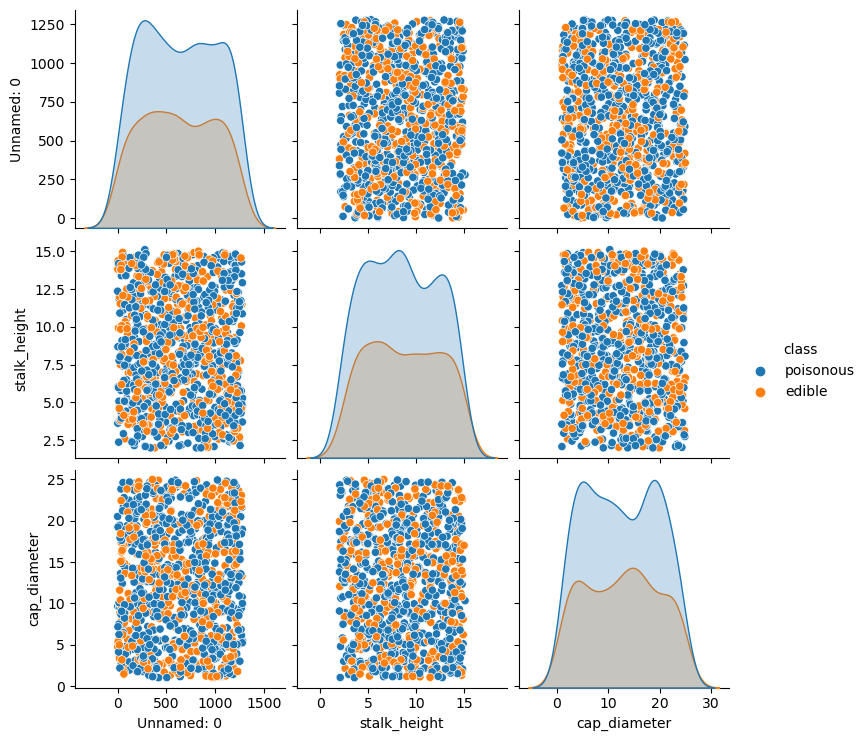

In [11]:
import seaborn as sns
sns.pairplot(df,hue = 'class')

# Data Preprocessing:

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

In [14]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,1,1,0,0,4,3,1,0,3,...,1,0,0,3,1,2,3,0,13.020616,9.993008
1988,926,0,1,4,1,1,1,2,0,1,...,0,0,2,5,8,2,0,1,3.751597,18.868135
1989,289,4,3,5,1,1,1,1,1,2,...,1,1,2,4,5,0,0,0,13.134058,15.740028
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957


In [15]:
from sklearn.model_selection import train_test_split
x = df.drop('class',axis=1)
y = df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(780, 25)
(196, 25)
(780,)
(196,)


# Data Visualizatoin:

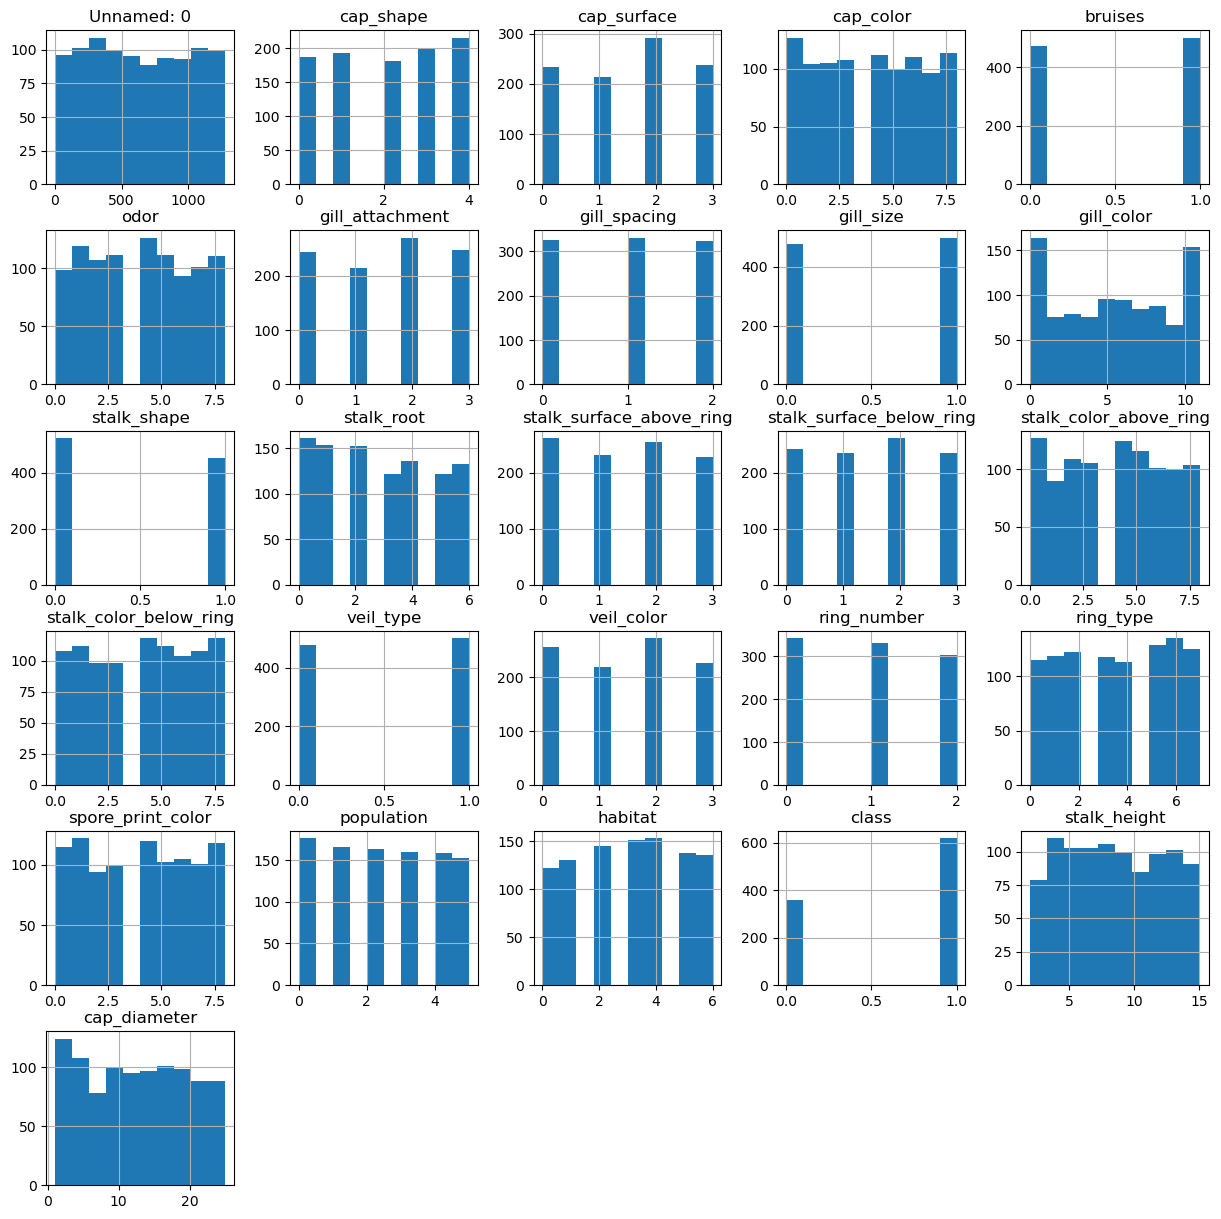

In [17]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,15))
plt.show()

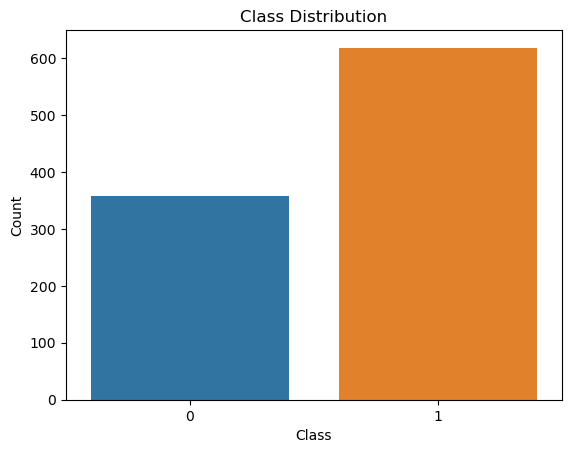

In [18]:
sns.countplot(x = 'class',data =df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [19]:
df.corr()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.002662,-0.025126,0.040939,-0.019980,-0.018715,-0.016446,0.043219,0.025476,0.018908,...,0.032241,0.003575,-0.068662,-0.000326,-0.004192,0.007227,0.033891,0.021431,0.000815,0.042726
cap_shape,-0.002662,1.000000,0.024645,0.020694,-0.007043,-0.035072,0.017091,-0.026279,0.017675,0.050239,...,-0.015447,-0.004381,0.038398,0.012335,0.008641,0.009890,-0.003017,0.008132,-0.019087,0.015284
cap_surface,-0.025126,0.024645,1.000000,0.010129,-0.013355,-0.001229,-0.008412,0.033273,-0.046493,0.033423,...,-0.042954,0.027026,0.005017,0.002838,-0.057301,-0.026943,-0.038786,-0.047799,0.026016,0.030579
cap_color,0.040939,0.020694,0.010129,1.000000,0.007862,-0.056524,0.000201,0.001367,0.034965,0.005884,...,-0.008664,-0.027817,0.037536,0.023527,0.045805,-0.039548,-0.006857,-0.048735,0.026948,0.006289
bruises,-0.019980,-0.007043,-0.013355,0.007862,1.000000,0.051111,0.006422,-0.017566,-0.004689,-0.033166,...,0.007497,-0.023444,-0.037722,-0.067596,-0.028591,0.014990,0.011681,-0.007932,0.067729,-0.049061
odor,-0.018715,-0.035072,-0.001229,-0.056524,0.051111,1.000000,-0.013212,-0.030698,-0.057671,-0.030782,...,0.022875,0.033718,-0.031397,0.005064,-0.078276,-0.000816,-0.021675,0.009625,-0.002972,-0.043273
gill_attachment,-0.016446,0.017091,-0.008412,0.000201,0.006422,-0.013212,1.000000,-0.024634,-0.011606,0.026293,...,-0.044643,-0.005227,0.048239,-0.049124,-0.020564,0.003722,-0.020783,-0.023758,-0.002778,-0.012882
gill_spacing,0.043219,-0.026279,0.033273,0.001367,-0.017566,-0.030698,-0.024634,1.000000,0.012648,-0.004135,...,-0.027653,-0.003433,0.009182,0.008323,0.023472,0.005042,0.024691,0.045121,0.006502,0.034553
gill_size,0.025476,0.017675,-0.046493,0.034965,-0.004689,-0.057671,-0.011606,0.012648,1.000000,-0.022993,...,-0.041509,-0.005179,-0.022972,0.005937,0.033767,0.002667,0.014063,0.019853,-0.017483,-0.029404
gill_color,0.018908,0.050239,0.033423,0.005884,-0.033166,-0.030782,0.026293,-0.004135,-0.022993,1.000000,...,-0.024141,-0.011001,-0.021489,0.019591,0.005718,0.024611,0.014710,-0.000277,0.025211,-0.008795


<Axes: >

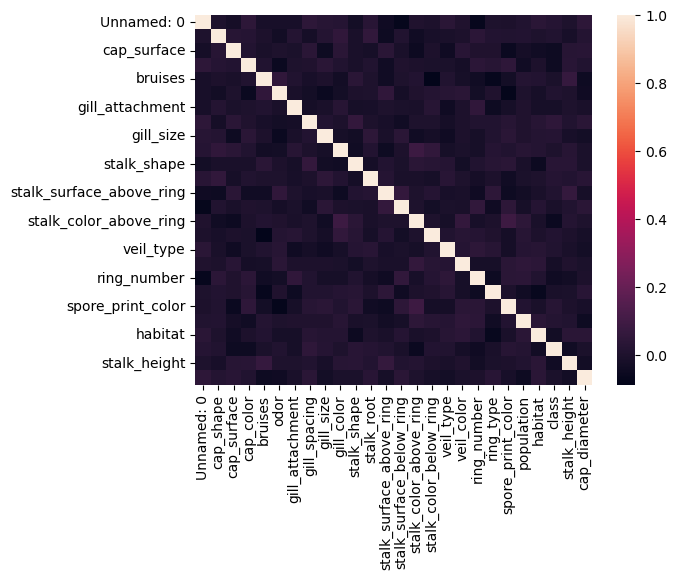

In [20]:
sns.heatmap(df.corr())

# SVM Implementation:

In [21]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')#linear kernel as start
model.fit(x_train,y_train)

SVC(kernel='linear')

In [22]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("Accuracy:",accuracy)

Accuracy: 0.6326530612244898


# Visualizatoin of SVM Results:

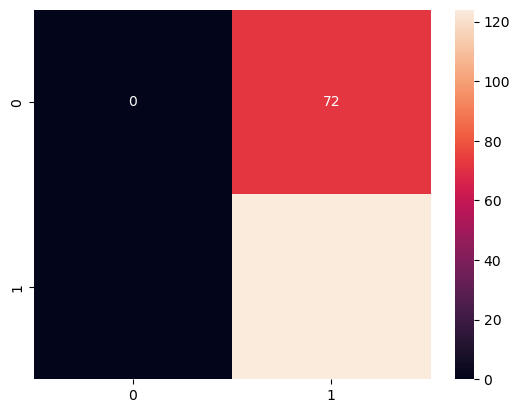

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)
plt.show()

# Parameter Tuning and Optimization:

In [31]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = {
    'gamma':[50,5,10,0.5],
    'C':[15,14,13,12,11,10,0.1,0.001]
}
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                         'gamma': [50, 5, 10, 0.5]})

In [32]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50}, 0.6333333333333334)

In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [34]:
X , Y = make_classification(n_samples =1000,n_features = 20,n_classes = 2,weights=[0.1,0.9],flip_y=0,random_state = 42)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)
svm = SVC(probability=True)
svm.fit(X_train,Y_train)
Y_pred_new = svm.predict(X_test)
print(classification_report(Y_test,Y_pred_new))

              precision    recall  f1-score   support

           0       0.74      0.37      0.49        38
           1       0.91      0.98      0.95       262

    accuracy                           0.90       300
   macro avg       0.83      0.67      0.72       300
weighted avg       0.89      0.90      0.89       300



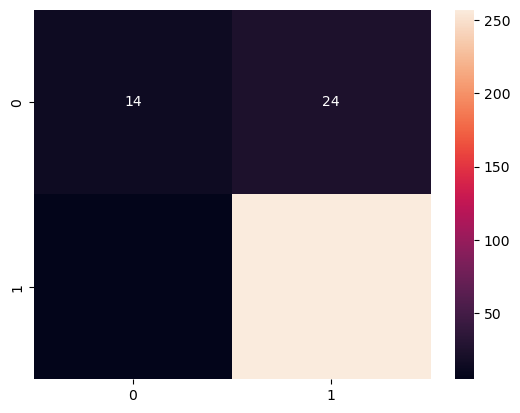

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,Y_pred_new)
sns.heatmap(cm,annot=True)
plt.show()

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

Y_pred_proba = svm.predict_proba(X_test)[:,1]
threshold =0.5
Y_pred_adjusted = np.where(Y_pred_proba > threshold,1,0)

conf_matrix_adjusted = confusion_matrix(Y_test,Y_pred_adjusted)
print("Confusion Matrix (adjusted threshold):",conf_matrix_adjusted)

Confusion Matrix (adjusted threshold): [[ 20  18]
 [  9 253]]


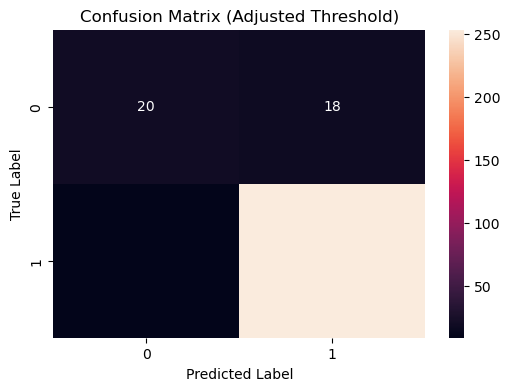

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        38
           1       0.93      0.97      0.95       262

    accuracy                           0.91       300
   macro avg       0.81      0.75      0.77       300
weighted avg       0.90      0.91      0.90       300



In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_adjusted,annot =True)
plt.title("Confusion Matrix (Adjusted Threshold)")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()
print(classification_report(Y_test,Y_pred_adjusted))

# Comparision and Analysis:

In [47]:
linear_model = SVC(kernel = 'linear')
linear_model.fit(X_train,Y_train)
linear_pred = linear_model.predict(X_test)
print(classification_report(Y_test,linear_pred))

              precision    recall  f1-score   support

           0       0.77      0.53      0.62        38
           1       0.93      0.98      0.96       262

    accuracy                           0.92       300
   macro avg       0.85      0.75      0.79       300
weighted avg       0.91      0.92      0.91       300



In [49]:
#experiment with different kernels
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
kernels = ['linear','poly','rbf']
kernel_results = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel,random_state=42)
    svm_model.fit(X_train,Y_train)
    Y_pred_kernel = svm_model.predict(X_test)
    
    kernel_results[kernel]={
        'Accuracy':accuracy_score(Y_test,Y_pred_kernel),
        'Precision':precision_score(Y_test,Y_pred_kernel),
        'Recall':recall_score(Y_test,Y_pred_kernel),
        'F1-Score':f1_score(Y_test,Y_pred_kernel)
    }

In [54]:
#the results
for kernel,metric in kernel_results.items():
    print("Kernel:",kernel)
    for metric,score in metric.items():
        print(f"{metric}:{score:.4f}")
    print("-"*20)

Kernel: linear
Accuracy:0.9200
Precision:0.9343
Recall:0.9771
F1-Score:0.9552
--------------------
Kernel: poly
Accuracy:0.8800
Precision:0.8844
Recall:0.9924
F1-Score:0.9353
--------------------
Kernel: rbf
Accuracy:0.9033
Precision:0.9146
Recall:0.9809
F1-Score:0.9466
--------------------
